In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('car_data.csv')
labels = ['Age', 'AnnualSalary', 'Purchased']
m = data.shape[0]
!mkdir -p res

In [3]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
x0 = data[labels[0]].values.reshape(m, 1)
x1 = data[labels[1]].values.reshape(m, 1)
y = data[labels[-1]].values.reshape(m, 1)

x0 = (x0 - np.mean(x0)) / np.var(x0)
x1 = (x1 - np.mean(x1)) / np.var(x1)

In [5]:
X = np.append(x0, x1, axis=1)
X = np.append(X, np.ones((X.shape[0], 1)), axis=1)

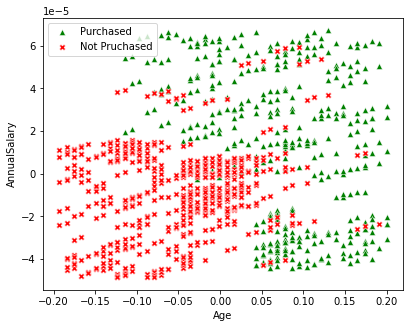

In [6]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.3, right=0.8)
sns.scatterplot(x = x0[y == 1],
                y = x1[y == 1],
                marker = "^",
                color = "green",
                label = "Purchased")
sns.scatterplot(x = x0[y == 0],
                y = x1[y == 0],
                marker = "X",
                color = "red",
                label = "Not Pruchased")
plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.savefig('scatter.png')
plt.show()

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def Loss(x, y, theta):
    y_pred = sigmoid(np.dot(x, theta))
    return np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / (-m)

In [9]:
def gradient(x, y, theta):
    y_pred = sigmoid(np.dot(x, theta))
    return np.dot(x.T, (y_pred - y)) / m

In [10]:
def draw(theta, id):
    sns.scatterplot(x = x0[y == 1],
                    y = x1[y == 1],
                    marker = "^",
                    color = "green")
    sns.scatterplot(x = x0[y == 0],
                    y = x1[y == 0],
                    marker = "X",
                    color = "red")

    MIN_x, MAX_x = np.min(x0), np.max(x0)
    MIN_y, MAX_y = np.min(x1), np.max(x1)
    
    sample = 50
    x_boundary = np.linspace(MIN_x, MAX_x, num=sample)
    y_boundary = np.linspace(MIN_y, MAX_y, num=sample)
    xx, yy = np.meshgrid(x_boundary, y_boundary)

    x_plot = np.append(xx.flatten().reshape((sample**2, 1)), yy.flatten().reshape((sample**2, 1)), axis=1)
    x_plot = np.append(x_plot, np.ones((x_plot.shape[0], 1)), axis=1)
    y_plot = np.dot(x_plot, theta).reshape(xx.shape) > 0.5
    plt.contourf(xx, yy, y_plot, alpha=0.3)
    plt.savefig(f'res/{id}.png')
    plt.show()

In [11]:
epochs = 30000
lr = 0.1
theta = np.zeros((2 + 1, 1))
Losses = []

epoch: 0	loss: 0.6931471805599454


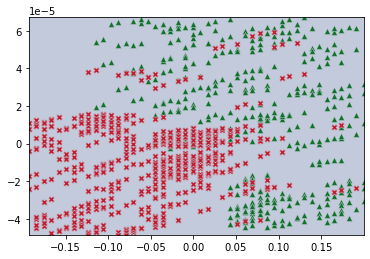

epoch: 1	loss: 0.6921191355441303
epoch: 2	loss: 0.691137951480017
epoch: 3	loss: 0.690201313789211
epoch: 4	loss: 0.689307020616509
epoch: 5	loss: 0.6884529776436057
epoch: 6	loss: 0.6876371931007915
epoch: 7	loss: 0.6868577729741903
epoch: 8	loss: 0.6861129164053987
epoch: 9	loss: 0.6854009112797962
epoch: 10	loss: 0.6847201299993234
epoch: 11	loss: 0.6840690254351363
epoch: 12	loss: 0.6834461270552403
epoch: 13	loss: 0.6828500372219742
epoch: 14	loss: 0.6822794276540421
epoch: 15	loss: 0.6817330360476762
epoch: 16	loss: 0.6812096628514447
epoch: 17	loss: 0.6807081681891883
epoch: 18	loss: 0.680227468925579
epoch: 19	loss: 0.6797665358688291
epoch: 20	loss: 0.6793243911051444
epoch: 21	loss: 0.6789001054595915
epoch: 22	loss: 0.6784927960781617
epoch: 23	loss: 0.6781016241259159
epoch: 24	loss: 0.6777257925962331
epoch: 25	loss: 0.6773645442263152
epoch: 26	loss: 0.6770171595142461
epoch: 27	loss: 0.6766829548330466
epoch: 28	loss: 0.6763612806373269
epoch: 29	loss: 0.676051519758282

epoch: 988	loss: 0.6093362674481562
epoch: 989	loss: 0.6092834595162333
epoch: 990	loss: 0.6092306731360387
epoch: 991	loss: 0.6091779082976109
epoch: 992	loss: 0.609125164990992
epoch: 993	loss: 0.6090724432062293
epoch: 994	loss: 0.609019742933373
epoch: 995	loss: 0.6089670641624787
epoch: 996	loss: 0.6089144068836057
epoch: 997	loss: 0.6088617710868175
epoch: 998	loss: 0.6088091567621823
epoch: 999	loss: 0.6087565638997716
epoch: 1000	loss: 0.6087039924896623


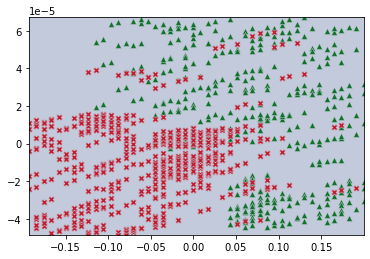

epoch: 1001	loss: 0.6086514425219348
epoch: 1002	loss: 0.6085989139866738
epoch: 1003	loss: 0.6085464068739682
epoch: 1004	loss: 0.6084939211739114
epoch: 1005	loss: 0.6084414568766009
epoch: 1006	loss: 0.6083890139721384
epoch: 1007	loss: 0.6083365924506298
epoch: 1008	loss: 0.6082841923021851
epoch: 1009	loss: 0.6082318135169189
epoch: 1010	loss: 0.6081794560849498
epoch: 1011	loss: 0.6081271199964006
epoch: 1012	loss: 0.6080748052413982
epoch: 1013	loss: 0.608022511810074
epoch: 1014	loss: 0.6079702396925637
epoch: 1015	loss: 0.6079179888790068
epoch: 1016	loss: 0.6078657593595473
epoch: 1017	loss: 0.6078135511243334
epoch: 1018	loss: 0.6077613641635176
epoch: 1019	loss: 0.6077091984672561
epoch: 1020	loss: 0.6076570540257101
epoch: 1021	loss: 0.6076049308290447
epoch: 1022	loss: 0.6075528288674291
epoch: 1023	loss: 0.6075007481310365
epoch: 1024	loss: 0.6074486886100451
epoch: 1025	loss: 0.6073966502946364
epoch: 1026	loss: 0.6073446331749969
epoch: 1027	loss: 0.6072926372413164
ep

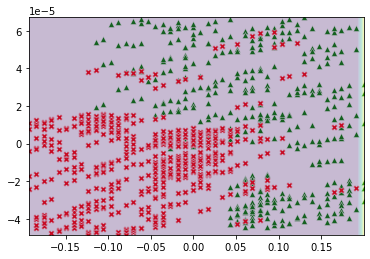

epoch: 2001	loss: 0.5653452743590375
epoch: 2002	loss: 0.5653098849982399
epoch: 2003	loss: 0.5652745091055483
epoch: 2004	loss: 0.5652391466747658
epoch: 2005	loss: 0.5652037976996985
epoch: 2006	loss: 0.5651684621741554
epoch: 2007	loss: 0.5651331400919487
epoch: 2008	loss: 0.565097831446894
epoch: 2009	loss: 0.5650625362328093
epoch: 2010	loss: 0.5650272544435163
epoch: 2011	loss: 0.5649919860728392
epoch: 2012	loss: 0.5649567311146058
epoch: 2013	loss: 0.5649214895626467
epoch: 2014	loss: 0.5648862614107955
epoch: 2015	loss: 0.5648510466528888
epoch: 2016	loss: 0.5648158452827667
epoch: 2017	loss: 0.5647806572942718
epoch: 2018	loss: 0.5647454826812502
epoch: 2019	loss: 0.5647103214375508
epoch: 2020	loss: 0.5646751735570258
epoch: 2021	loss: 0.5646400390335298
epoch: 2022	loss: 0.5646049178609212
epoch: 2023	loss: 0.5645698100330613
epoch: 2024	loss: 0.5645347155438142
epoch: 2025	loss: 0.5644996343870471
epoch: 2026	loss: 0.5644645665566304
epoch: 2027	loss: 0.5644295120464373
ep

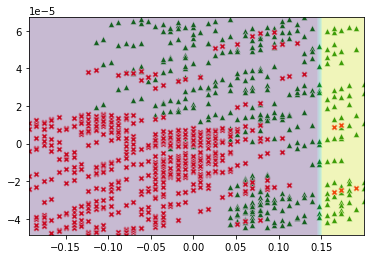

epoch: 3001	loss: 0.5357699985399026
epoch: 3002	loss: 0.535745438834002
epoch: 3003	loss: 0.5357208877213888
epoch: 3004	loss: 0.5356963451983136
epoch: 3005	loss: 0.5356718112610288
epoch: 3006	loss: 0.5356472859057886
epoch: 3007	loss: 0.5356227691288493
epoch: 3008	loss: 0.5355982609264688
epoch: 3009	loss: 0.5355737612949071
epoch: 3010	loss: 0.5355492702304259
epoch: 3011	loss: 0.535524787729289
epoch: 3012	loss: 0.5355003137877618
epoch: 3013	loss: 0.5354758484021119
epoch: 3014	loss: 0.5354513915686087
epoch: 3015	loss: 0.5354269432835228
epoch: 3016	loss: 0.535402503543128
epoch: 3017	loss: 0.5353780723436986
epoch: 3018	loss: 0.5353536496815117
epoch: 3019	loss: 0.5353292355528458
epoch: 3020	loss: 0.5353048299539817
epoch: 3021	loss: 0.5352804328812015
epoch: 3022	loss: 0.5352560443307893
epoch: 3023	loss: 0.5352316642990318
epoch: 3024	loss: 0.5352072927822165
epoch: 3025	loss: 0.5351829297766333
epoch: 3026	loss: 0.535158575278574
epoch: 3027	loss: 0.5351342292843322
epoch

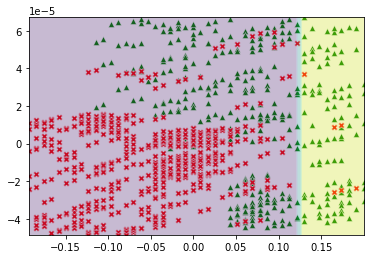

epoch: 4001	loss: 0.5149500426930299
epoch: 4002	loss: 0.5149324790159846
epoch: 4003	loss: 0.5149149209772181
epoch: 4004	loss: 0.514897368574442
epoch: 4005	loss: 0.5148798218053686
epoch: 4006	loss: 0.5148622806677118
epoch: 4007	loss: 0.5148447451591864
epoch: 4008	loss: 0.5148272152775083
epoch: 4009	loss: 0.5148096910203946
epoch: 4010	loss: 0.5147921723855634
epoch: 4011	loss: 0.514774659370734
epoch: 4012	loss: 0.5147571519736266
epoch: 4013	loss: 0.5147396501919625
epoch: 4014	loss: 0.5147221540234646
epoch: 4015	loss: 0.5147046634658563
epoch: 4016	loss: 0.5146871785168623
epoch: 4017	loss: 0.5146696991742087
epoch: 4018	loss: 0.514652225435622
epoch: 4019	loss: 0.5146347572988305
epoch: 4020	loss: 0.514617294761563
epoch: 4021	loss: 0.5145998378215502
epoch: 4022	loss: 0.5145823864765231
epoch: 4023	loss: 0.514564940724214
epoch: 4024	loss: 0.5145475005623567
epoch: 4025	loss: 0.5145300659886854
epoch: 4026	loss: 0.5145126370009361
epoch: 4027	loss: 0.5144952135968454
epoch:

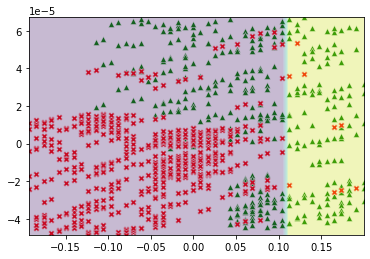

epoch: 5001	loss: 0.49986368307975126
epoch: 5002	loss: 0.49985077603606703
epoch: 5003	loss: 0.4998378728076168
epoch: 5004	loss: 0.4998249733929686
epoch: 5005	loss: 0.499812077790691
epoch: 5006	loss: 0.4997991859993531
epoch: 5007	loss: 0.49978629801752483
epoch: 5008	loss: 0.4997734138437766
epoch: 5009	loss: 0.49976053347667987
epoch: 5010	loss: 0.4997476569148061
epoch: 5011	loss: 0.499734784156728
epoch: 5012	loss: 0.4997219152010185
epoch: 5013	loss: 0.4997090500462515
epoch: 5014	loss: 0.49969618869100124
epoch: 5015	loss: 0.4996833311338429
epoch: 5016	loss: 0.49967047737335213
epoch: 5017	loss: 0.4996576274081052
epoch: 5018	loss: 0.49964478123667927
epoch: 5019	loss: 0.4996319388576518
epoch: 5020	loss: 0.49961910026960116
epoch: 5021	loss: 0.49960626547110615
epoch: 5022	loss: 0.4995934344607465
epoch: 5023	loss: 0.4995806072371024
epoch: 5024	loss: 0.4995677837987546
epoch: 5025	loss: 0.4995549641442847
epoch: 5026	loss: 0.4995421482722746
epoch: 5027	loss: 0.49952933618

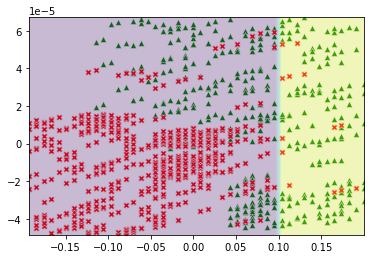

epoch: 6001	loss: 0.4886487619523493
epoch: 6002	loss: 0.488639050277951
epoch: 6003	loss: 0.4886293412623273
epoch: 6004	loss: 0.4886196349045549
epoch: 6005	loss: 0.4886099312037111
epoch: 6006	loss: 0.4886002301588731
epoch: 6007	loss: 0.48859053176911915
epoch: 6008	loss: 0.48858083603352737
epoch: 6009	loss: 0.4885711429511764
epoch: 6010	loss: 0.4885614525211456
epoch: 6011	loss: 0.48855176474251427
epoch: 6012	loss: 0.48854207961436213
epoch: 6013	loss: 0.4885323971357697
epoch: 6014	loss: 0.48852271730581753
epoch: 6015	loss: 0.4885130401235866
epoch: 6016	loss: 0.48850336558815843
epoch: 6017	loss: 0.48849369369861484
epoch: 6018	loss: 0.48848402445403794
epoch: 6019	loss: 0.4884743578535103
epoch: 6020	loss: 0.4884646938961151
epoch: 6021	loss: 0.4884550325809355
epoch: 6022	loss: 0.48844537390705534
epoch: 6023	loss: 0.4884357178735588
epoch: 6024	loss: 0.48842606447953035
epoch: 6025	loss: 0.4884164137240549
epoch: 6026	loss: 0.48840676560621776
epoch: 6027	loss: 0.48839712

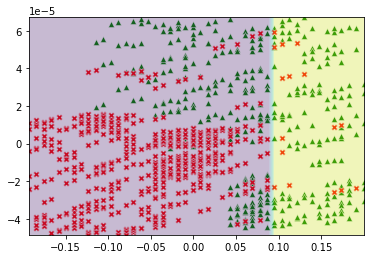

epoch: 7001	loss: 0.4801264749833436
epoch: 7002	loss: 0.4801190187242652
epoch: 7003	loss: 0.4801115643679571
epoch: 7004	loss: 0.48010411191380614
epoch: 7005	loss: 0.4800966613611994
epoch: 7006	loss: 0.48008921270952415
epoch: 7007	loss: 0.4800817659581679
epoch: 7008	loss: 0.4800743211065187
epoch: 7009	loss: 0.48006687815396426
epoch: 7010	loss: 0.4800594370998931
epoch: 7011	loss: 0.4800519979436936
epoch: 7012	loss: 0.4800445606847545
epoch: 7013	loss: 0.4800371253224649
epoch: 7014	loss: 0.48002969185621397
epoch: 7015	loss: 0.4800222602853912
epoch: 7016	loss: 0.4800148306093865
epoch: 7017	loss: 0.48000740282758947
epoch: 7018	loss: 0.47999997693939067
epoch: 7019	loss: 0.4799925529441803
epoch: 7020	loss: 0.47998513084134925
epoch: 7021	loss: 0.47997771063028827
epoch: 7022	loss: 0.4799702923103886
epoch: 7023	loss: 0.4799628758810416
epoch: 7024	loss: 0.4799554613416391
epoch: 7025	loss: 0.4799480486915728
epoch: 7026	loss: 0.4799406379302349
epoch: 7027	loss: 0.4799332290

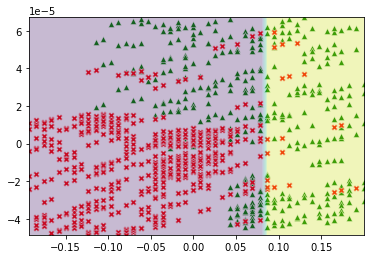

epoch: 8001	loss: 0.47352793474949767
epoch: 8002	loss: 0.47352211099709596
epoch: 8003	loss: 0.47351628863872447
epoch: 8004	loss: 0.4735104676739644
epoch: 8005	loss: 0.4735046481023975
epoch: 8006	loss: 0.47349882992360504
epoch: 8007	loss: 0.47349301313716896
epoch: 8008	loss: 0.47348719774267123
epoch: 8009	loss: 0.4734813837396939
epoch: 8010	loss: 0.47347557112781913
epoch: 8011	loss: 0.4734697599066294
epoch: 8012	loss: 0.47346395007570713
epoch: 8013	loss: 0.47345814163463507
epoch: 8014	loss: 0.4734523345829961
epoch: 8015	loss: 0.4734465289203732
epoch: 8016	loss: 0.4734407246463496
epoch: 8017	loss: 0.4734349217605085
epoch: 8018	loss: 0.47342912026243333
epoch: 8019	loss: 0.4734233201517078
epoch: 8020	loss: 0.4734175214279157
epoch: 8021	loss: 0.47341172409064086
epoch: 8022	loss: 0.4734059281394674
epoch: 8023	loss: 0.4734001335739795
epoch: 8024	loss: 0.4733943403937616
epoch: 8025	loss: 0.4733885485983982
epoch: 8026	loss: 0.473382758187474
epoch: 8027	loss: 0.47337696

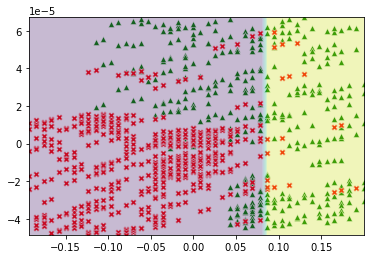

epoch: 9001	loss: 0.4683368031563324
epoch: 9002	loss: 0.468332187393215
epoch: 9003	loss: 0.46832757267254627
epoch: 9004	loss: 0.468322958994033
epoch: 9005	loss: 0.4683183463573821
epoch: 9006	loss: 0.4683137347623006
epoch: 9007	loss: 0.46830912420849563
epoch: 9008	loss: 0.4683045146956744
epoch: 9009	loss: 0.4682999062235442
epoch: 9010	loss: 0.46829529879181264
epoch: 9011	loss: 0.46829069240018695
epoch: 9012	loss: 0.46828608704837504
epoch: 9013	loss: 0.4682814827360844
epoch: 9014	loss: 0.46827687946302315
epoch: 9015	loss: 0.4682722772288989
epoch: 9016	loss: 0.46826767603341996
epoch: 9017	loss: 0.46826307587629423
epoch: 9018	loss: 0.46825847675723015
epoch: 9019	loss: 0.4682538786759359
epoch: 9020	loss: 0.4682492816321199
epoch: 9021	loss: 0.46824468562549076
epoch: 9022	loss: 0.46824009065575717
epoch: 9023	loss: 0.4682354967226277
epoch: 9024	loss: 0.46823090382581145
epoch: 9025	loss: 0.468226311965017
epoch: 9026	loss: 0.4682217211399537
epoch: 9027	loss: 0.468217131

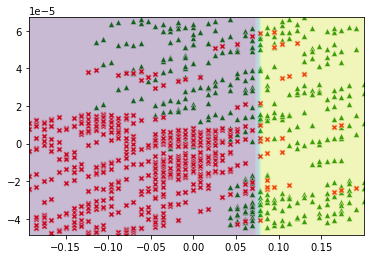

epoch: 10001	loss: 0.46419689420978694
epoch: 10002	loss: 0.4641931896739607
epoch: 10003	loss: 0.4641894859317213
epoch: 10004	loss: 0.4641857829828589
epoch: 10005	loss: 0.4641820808271634
epoch: 10006	loss: 0.46417837946442514
epoch: 10007	loss: 0.46417467889443426
epoch: 10008	loss: 0.46417097911698113
epoch: 10009	loss: 0.464167280131856
epoch: 10010	loss: 0.46416358193884943
epoch: 10011	loss: 0.464159884537752
epoch: 10012	loss: 0.46415618792835417
epoch: 10013	loss: 0.46415249211044657
epoch: 10014	loss: 0.46414879708382
epoch: 10015	loss: 0.4641451028482652
epoch: 10016	loss: 0.464141409403573
epoch: 10017	loss: 0.4641377167495343
epoch: 10018	loss: 0.46413402488594024
epoch: 10019	loss: 0.4641303338125817
epoch: 10020	loss: 0.46412664352924987
epoch: 10021	loss: 0.4641229540357359
epoch: 10022	loss: 0.4641192653318311
epoch: 10023	loss: 0.4641155774173267
epoch: 10024	loss: 0.4641118902920142
epoch: 10025	loss: 0.464108203955685
epoch: 10026	loss: 0.4641045184081306
epoch: 10

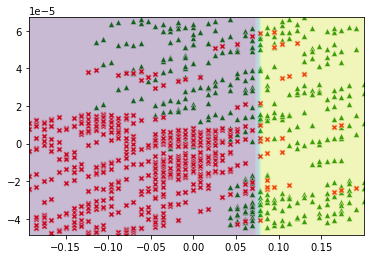

epoch: 11001	loss: 0.46085647720416545
epoch: 11002	loss: 0.46085347166615415
epoch: 11003	loss: 0.46085046674177327
epoch: 11004	loss: 0.46084746243086955
epoch: 11005	loss: 0.46084445873328955
epoch: 11006	loss: 0.46084145564888
epoch: 11007	loss: 0.4608384531774876
epoch: 11008	loss: 0.4608354513189591
epoch: 11009	loss: 0.4608324500731414
epoch: 11010	loss: 0.4608294494398813
epoch: 11011	loss: 0.46082644941902573
epoch: 11012	loss: 0.4608234500104217
epoch: 11013	loss: 0.4608204512139162
epoch: 11014	loss: 0.4608174530293562
epoch: 11015	loss: 0.4608144554565889
epoch: 11016	loss: 0.46081145849546135
epoch: 11017	loss: 0.4608084621458209
epoch: 11018	loss: 0.4608054664075147
epoch: 11019	loss: 0.46080247128039004
epoch: 11020	loss: 0.46079947676429417
epoch: 11021	loss: 0.46079648285907465
epoch: 11022	loss: 0.46079348956457883
epoch: 11023	loss: 0.46079049688065404
epoch: 11024	loss: 0.460787504807148
epoch: 11025	loss: 0.4607845133439082
epoch: 11026	loss: 0.4607815224907822
epo

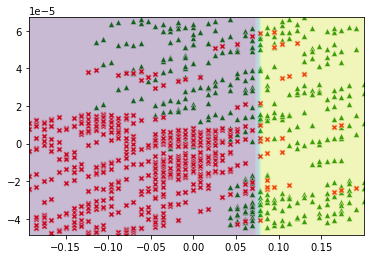

epoch: 12001	loss: 0.4581337597926254
epoch: 12002	loss: 0.4581312983709984
epoch: 12003	loss: 0.4581288374303774
epoch: 12004	loss: 0.4581263769706483
epoch: 12005	loss: 0.458123916991697
epoch: 12006	loss: 0.4581214574934095
epoch: 12007	loss: 0.45811899847567167
epoch: 12008	loss: 0.45811653993836954
epoch: 12009	loss: 0.4581140818813893
epoch: 12010	loss: 0.45811162430461705
epoch: 12011	loss: 0.45810916720793876
epoch: 12012	loss: 0.4581067105912407
epoch: 12013	loss: 0.458104254454409
epoch: 12014	loss: 0.45810179879732993
epoch: 12015	loss: 0.45809934361988974
epoch: 12016	loss: 0.4580968889219747
epoch: 12017	loss: 0.4580944347034711
epoch: 12018	loss: 0.45809198096426534
epoch: 12019	loss: 0.45808952770424377
epoch: 12020	loss: 0.45808707492329287
epoch: 12021	loss: 0.458084622621299
epoch: 12022	loss: 0.45808217079814884
epoch: 12023	loss: 0.45807971945372855
epoch: 12024	loss: 0.458077268587925
epoch: 12025	loss: 0.4580748182006247
epoch: 12026	loss: 0.45807236829171416
epoc

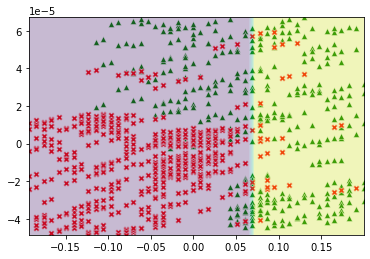

epoch: 13001	loss: 0.45589491272991406
epoch: 13002	loss: 0.45589288034220693
epoch: 13003	loss: 0.45589084833609955
epoch: 13004	loss: 0.45588881671150566
epoch: 13005	loss: 0.4558867854683391
epoch: 13006	loss: 0.4558847546065136
epoch: 13007	loss: 0.4558827241259431
epoch: 13008	loss: 0.4558806940265415
epoch: 13009	loss: 0.4558786643082225
epoch: 13010	loss: 0.4558766349709002
epoch: 13011	loss: 0.4558746060144883
epoch: 13012	loss: 0.4558725774389011
epoch: 13013	loss: 0.4558705492440524
epoch: 13014	loss: 0.4558685214298562
epoch: 13015	loss: 0.4558664939962265
epoch: 13016	loss: 0.4558644669430775
epoch: 13017	loss: 0.4558624402703231
epoch: 13018	loss: 0.4558604139778776
epoch: 13019	loss: 0.4558583880656548
epoch: 13020	loss: 0.45585636253356926
epoch: 13021	loss: 0.4558543373815349
epoch: 13022	loss: 0.4558523126094659
epoch: 13023	loss: 0.45585028821727663
epoch: 13024	loss: 0.4558482642048813
epoch: 13025	loss: 0.45584624057219403
epoch: 13026	loss: 0.4558442173191292
epoch

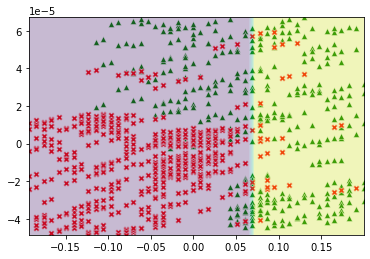

epoch: 14001	loss: 0.45403972092405365
epoch: 14002	loss: 0.4540380306801337
epoch: 14003	loss: 0.45403634074217664
epoch: 14004	loss: 0.45403465111011637
epoch: 14005	loss: 0.4540329617838868
epoch: 14006	loss: 0.4540312727634217
epoch: 14007	loss: 0.45402958404865523
epoch: 14008	loss: 0.4540278956395214
epoch: 14009	loss: 0.45402620753595413
epoch: 14010	loss: 0.45402451973788743
epoch: 14011	loss: 0.45402283224525525
epoch: 14012	loss: 0.4540211450579918
epoch: 14013	loss: 0.4540194581760311
epoch: 14014	loss: 0.4540177715993072
epoch: 14015	loss: 0.4540160853277542
epoch: 14016	loss: 0.4540143993613063
epoch: 14017	loss: 0.45401271369989754
epoch: 14018	loss: 0.454011028343462
epoch: 14019	loss: 0.45400934329193404
epoch: 14020	loss: 0.45400765854524777
epoch: 14021	loss: 0.4540059741033374
epoch: 14022	loss: 0.4540042899661371
epoch: 14023	loss: 0.4540026061335811
epoch: 14024	loss: 0.4540009226056037
epoch: 14025	loss: 0.4539992393821392
epoch: 14026	loss: 0.4539975564631219
epo

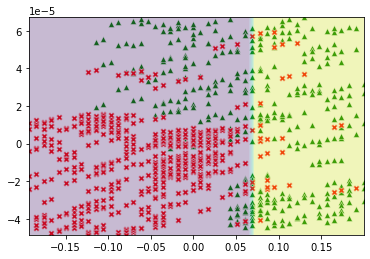

epoch: 15001	loss: 0.4524919928614921
epoch: 15002	loss: 0.4524905782145065
epoch: 15003	loss: 0.45248916381515486
epoch: 15004	loss: 0.4524877496633858
epoch: 15005	loss: 0.4524863357591481
epoch: 15006	loss: 0.45248492210239055
epoch: 15007	loss: 0.4524835086930618
epoch: 15008	loss: 0.45248209553111063
epoch: 15009	loss: 0.4524806826164858
epoch: 15010	loss: 0.4524792699491361
epoch: 15011	loss: 0.4524778575290104
epoch: 15012	loss: 0.4524764453560573
epoch: 15013	loss: 0.4524750334302258
epoch: 15014	loss: 0.45247362175146477
epoch: 15015	loss: 0.45247221031972285
epoch: 15016	loss: 0.4524707991349491
epoch: 15017	loss: 0.45246938819709215
epoch: 15018	loss: 0.4524679775061011
epoch: 15019	loss: 0.45246656706192484
epoch: 15020	loss: 0.45246515686451216
epoch: 15021	loss: 0.45246374691381197
epoch: 15022	loss: 0.45246233720977336
epoch: 15023	loss: 0.4524609277523451
epoch: 15024	loss: 0.4524595185414762
epoch: 15025	loss: 0.45245810957711574
epoch: 15026	loss: 0.4524567008592126
e

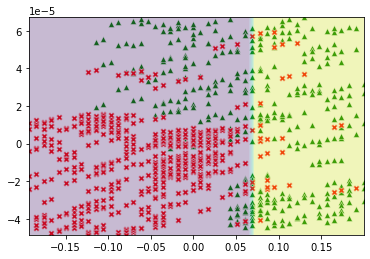

epoch: 16001	loss: 0.45119301197405204
epoch: 16002	loss: 0.4511918213035165
epoch: 16003	loss: 0.4511906308350894
epoch: 16004	loss: 0.4511894405687307
epoch: 16005	loss: 0.4511882505043999
epoch: 16006	loss: 0.4511870606420569
epoch: 16007	loss: 0.4511858709816613
epoch: 16008	loss: 0.45118468152317304
epoch: 16009	loss: 0.45118349226655174
epoch: 16010	loss: 0.45118230321175734
epoch: 16011	loss: 0.4511811143587496
epoch: 16012	loss: 0.4511799257074882
epoch: 16013	loss: 0.4511787372579331
epoch: 16014	loss: 0.45117754901004414
epoch: 16015	loss: 0.45117636096378094
epoch: 16016	loss: 0.45117517311910355
epoch: 16017	loss: 0.4511739854759718
epoch: 16018	loss: 0.45117279803434546
epoch: 16019	loss: 0.4511716107941845
epoch: 16020	loss: 0.45117042375544886
epoch: 16021	loss: 0.4511692369180982
epoch: 16022	loss: 0.4511680502820926
epoch: 16023	loss: 0.45116686384739196
epoch: 16024	loss: 0.4511656776139561
epoch: 16025	loss: 0.4511644915817451
epoch: 16026	loss: 0.4511633057507188
ep

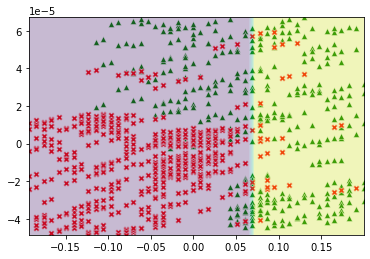

epoch: 17001	loss: 0.45009697707346513
epoch: 17002	loss: 0.45009596987696643
epoch: 17003	loss: 0.4500949628466582
epoch: 17004	loss: 0.45009395598250845
epoch: 17005	loss: 0.4500929492844853
epoch: 17006	loss: 0.4500919427525569
epoch: 17007	loss: 0.4500909363866912
epoch: 17008	loss: 0.45008993018685634
epoch: 17009	loss: 0.45008892415302043
epoch: 17010	loss: 0.45008791828515166
epoch: 17011	loss: 0.45008691258321804
epoch: 17012	loss: 0.4500859070471876
epoch: 17013	loss: 0.4500849016770286
epoch: 17014	loss: 0.4500838964727092
epoch: 17015	loss: 0.45008289143419744
epoch: 17016	loss: 0.45008188656146153
epoch: 17017	loss: 0.4500808818544697
epoch: 17018	loss: 0.4500798773131899
epoch: 17019	loss: 0.4500788729375905
epoch: 17020	loss: 0.4500778687276396
epoch: 17021	loss: 0.45007686468330543
epoch: 17022	loss: 0.4500758608045561
epoch: 17023	loss: 0.45007485709135986
epoch: 17024	loss: 0.4500738535436849
epoch: 17025	loss: 0.45007285016149945
epoch: 17026	loss: 0.45007184694477176

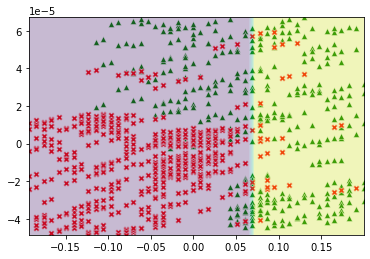

epoch: 18001	loss: 0.4491677707905679
epoch: 18002	loss: 0.44916691496078565
epoch: 18003	loss: 0.4491660592685788
epoch: 18004	loss: 0.44916520371392166
epoch: 18005	loss: 0.44916434829678875
epoch: 18006	loss: 0.4491634930171546
epoch: 18007	loss: 0.44916263787499344
epoch: 18008	loss: 0.44916178287027997
epoch: 18009	loss: 0.4491609280029885
epoch: 18010	loss: 0.44916007327309354
epoch: 18011	loss: 0.44915921868056957
epoch: 18012	loss: 0.44915836422539107
epoch: 18013	loss: 0.44915750990753245
epoch: 18014	loss: 0.44915665572696845
epoch: 18015	loss: 0.44915580168367325
epoch: 18016	loss: 0.44915494777762155
epoch: 18017	loss: 0.44915409400878775
epoch: 18018	loss: 0.4491532403771465
epoch: 18019	loss: 0.4491523868826722
epoch: 18020	loss: 0.4491515335253393
epoch: 18021	loss: 0.44915068030512273
epoch: 18022	loss: 0.4491498272219965
epoch: 18023	loss: 0.4491489742759354
epoch: 18024	loss: 0.4491481214669141
epoch: 18025	loss: 0.4491472687949069
epoch: 18026	loss: 0.449146416259888

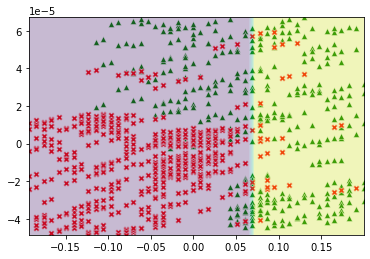

epoch: 19001	loss: 0.44837663182420295
epoch: 19002	loss: 0.4483759016717124
epoch: 19003	loss: 0.44837517163379903
epoch: 19004	loss: 0.448374441710442
epoch: 19005	loss: 0.4483737119016208
epoch: 19006	loss: 0.44837298220731475
epoch: 19007	loss: 0.44837225262750324
epoch: 19008	loss: 0.44837152316216566
epoch: 19009	loss: 0.44837079381128137
epoch: 19010	loss: 0.4483700645748298
epoch: 19011	loss: 0.44836933545279045
epoch: 19012	loss: 0.44836860644514254
epoch: 19013	loss: 0.44836787755186547
epoch: 19014	loss: 0.4483671487729389
epoch: 19015	loss: 0.44836642010834193
epoch: 19016	loss: 0.44836569155805417
epoch: 19017	loss: 0.4483649631220549
epoch: 19018	loss: 0.4483642348003237
epoch: 19019	loss: 0.44836350659284
epoch: 19020	loss: 0.4483627784995831
epoch: 19021	loss: 0.4483620505205325
epoch: 19022	loss: 0.4483613226556677
epoch: 19023	loss: 0.44836059490496816
epoch: 19024	loss: 0.4483598672684131
epoch: 19025	loss: 0.44835913974598224
epoch: 19026	loss: 0.44835841233765505
e

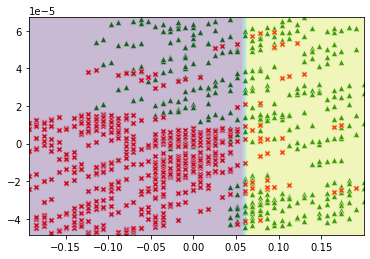

epoch: 20001	loss: 0.44770045323789787
epoch: 20002	loss: 0.4476998280351311
epoch: 20003	loss: 0.44769920292830945
epoch: 20004	loss: 0.44769857791741635
epoch: 20005	loss: 0.4476979530024349
epoch: 20006	loss: 0.4476973281833484
epoch: 20007	loss: 0.4476967034601402
epoch: 20008	loss: 0.4476960788327933
epoch: 20009	loss: 0.447695454301291
epoch: 20010	loss: 0.4476948298656165
epoch: 20011	loss: 0.44769420552575323
epoch: 20012	loss: 0.4476935812816842
epoch: 20013	loss: 0.4476929571333929
epoch: 20014	loss: 0.4476923330808623
epoch: 20015	loss: 0.4476917091240761
epoch: 20016	loss: 0.44769108526301704
epoch: 20017	loss: 0.4476904614976686
epoch: 20018	loss: 0.44768983782801414
epoch: 20019	loss: 0.44768921425403685
epoch: 20020	loss: 0.44768859077572004
epoch: 20021	loss: 0.44768796739304695
epoch: 20022	loss: 0.44768734410600086
epoch: 20023	loss: 0.4476867209145651
epoch: 20024	loss: 0.4476860978187228
epoch: 20025	loss: 0.44768547481845744
epoch: 20026	loss: 0.44768485191375224
e

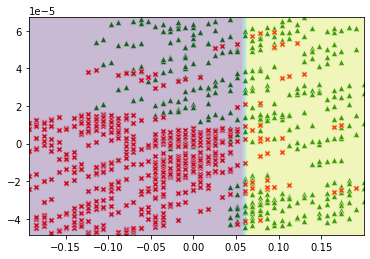

epoch: 21001	loss: 0.44712052148697773
epoch: 21002	loss: 0.4471199843820535
epoch: 21003	loss: 0.4471194473578705
epoch: 21004	loss: 0.44711891041441504
epoch: 21005	loss: 0.44711837355167333
epoch: 21006	loss: 0.44711783676963185
epoch: 21007	loss: 0.4471173000682765
epoch: 21008	loss: 0.4471167634475938
epoch: 21009	loss: 0.44711622690756997
epoch: 21010	loss: 0.44711569044819116
epoch: 21011	loss: 0.4471151540694439
epoch: 21012	loss: 0.44711461777131434
epoch: 21013	loss: 0.4471140815537887
epoch: 21014	loss: 0.4471135454168533
epoch: 21015	loss: 0.4471130093604944
epoch: 21016	loss: 0.44711247338469845
epoch: 21017	loss: 0.4471119374894515
epoch: 21018	loss: 0.4471114016747401
epoch: 21019	loss: 0.44711086594055033
epoch: 21020	loss: 0.4471103302868686
epoch: 21021	loss: 0.44710979471368123
epoch: 21022	loss: 0.44710925922097455
epoch: 21023	loss: 0.44710872380873473
epoch: 21024	loss: 0.4471081884769482
epoch: 21025	loss: 0.4471076532256012
epoch: 21026	loss: 0.4471071180546802


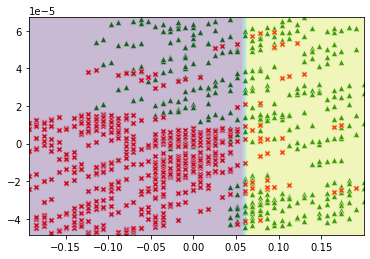

epoch: 22001	loss: 0.44662157037430933
epoch: 22002	loss: 0.4466211075711303
epoch: 22003	loss: 0.4466206448362037
epoch: 22004	loss: 0.44662018216951804
epoch: 22005	loss: 0.44661971957106206
epoch: 22006	loss: 0.4466192570408245
epoch: 22007	loss: 0.446618794578794
epoch: 22008	loss: 0.4466183321849593
epoch: 22009	loss: 0.44661786985930896
epoch: 22010	loss: 0.4466174076018318
epoch: 22011	loss: 0.4466169454125164
epoch: 22012	loss: 0.4466164832913515
epoch: 22013	loss: 0.44661602123832583
epoch: 22014	loss: 0.4466155592534281
epoch: 22015	loss: 0.44661509733664695
epoch: 22016	loss: 0.44661463548797103
epoch: 22017	loss: 0.4466141737073892
epoch: 22018	loss: 0.4466137119948901
epoch: 22019	loss: 0.4466132503504624
epoch: 22020	loss: 0.4466127887740948
epoch: 22021	loss: 0.446612327265776
epoch: 22022	loss: 0.4466118658254949
epoch: 22023	loss: 0.44661140445324
epoch: 22024	loss: 0.446610943149
epoch: 22025	loss: 0.44661048191276387
epoch: 22026	loss: 0.4466100207445201
epoch: 22027

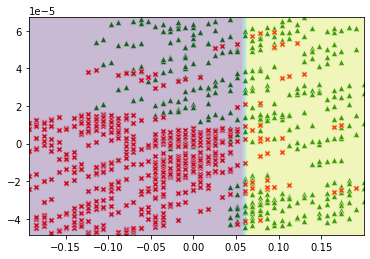

epoch: 23001	loss: 0.44619106315409773
epoch: 23002	loss: 0.44619066328666673
epoch: 23003	loss: 0.4461902634771674
epoch: 23004	loss: 0.4461898637255904
epoch: 23005	loss: 0.44618946403192616
epoch: 23006	loss: 0.44618906439616546
epoch: 23007	loss: 0.44618866481829905
epoch: 23008	loss: 0.44618826529831723
epoch: 23009	loss: 0.4461878658362109
epoch: 23010	loss: 0.4461874664319705
epoch: 23011	loss: 0.4461870670855868
epoch: 23012	loss: 0.44618666779705035
epoch: 23013	loss: 0.44618626856635185
epoch: 23014	loss: 0.44618586939348176
epoch: 23015	loss: 0.44618547027843086
epoch: 23016	loss: 0.4461850712211897
epoch: 23017	loss: 0.44618467222174907
epoch: 23018	loss: 0.4461842732800994
epoch: 23019	loss: 0.44618387439623153
epoch: 23020	loss: 0.446183475570136
epoch: 23021	loss: 0.44618307680180347
epoch: 23022	loss: 0.4461826780912245
epoch: 23023	loss: 0.4461822794383899
epoch: 23024	loss: 0.44618188084329025
epoch: 23025	loss: 0.44618148230591614
epoch: 23026	loss: 0.446181083826258

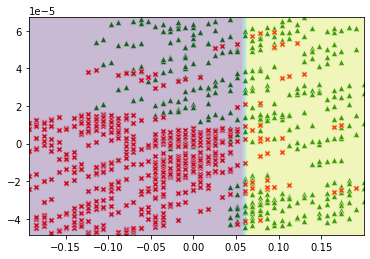

epoch: 24001	loss: 0.4458186420251636
epoch: 24002	loss: 0.44581829567529946
epoch: 24003	loss: 0.44581794937479097
epoch: 24004	loss: 0.44581760312363017
epoch: 24005	loss: 0.44581725692180946
epoch: 24006	loss: 0.445816910769321
epoch: 24007	loss: 0.4458165646661568
epoch: 24008	loss: 0.4458162186123092
epoch: 24009	loss: 0.4458158726077703
epoch: 24010	loss: 0.4458155266525323
epoch: 24011	loss: 0.44581518074658744
epoch: 24012	loss: 0.4458148348899279
epoch: 24013	loss: 0.44581448908254584
epoch: 24014	loss: 0.44581414332443353
epoch: 24015	loss: 0.445813797615583
epoch: 24016	loss: 0.44581345195598665
epoch: 24017	loss: 0.44581310634563653
epoch: 24018	loss: 0.4458127607845249
epoch: 24019	loss: 0.445812415272644
epoch: 24020	loss: 0.445812069809986
epoch: 24021	loss: 0.44581172439654304
epoch: 24022	loss: 0.4458113790323074
epoch: 24023	loss: 0.44581103371727127
epoch: 24024	loss: 0.44581068845142674
epoch: 24025	loss: 0.44581034323476626
epoch: 24026	loss: 0.4458099980672819
epo

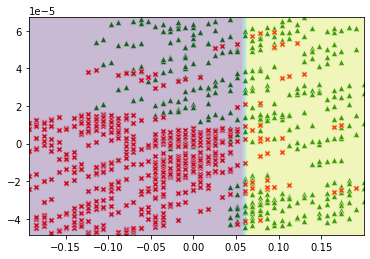

epoch: 25001	loss: 0.4454957018844759
epoch: 25002	loss: 0.4454954012066041
epoch: 25003	loss: 0.44549510057092545
epoch: 25004	loss: 0.44549479997743346
epoch: 25005	loss: 0.44549449942612157
epoch: 25006	loss: 0.4454941989169832
epoch: 25007	loss: 0.4454938984500119
epoch: 25008	loss: 0.4454935980252011
epoch: 25009	loss: 0.4454932976425441
epoch: 25010	loss: 0.4454929973020345
epoch: 25011	loss: 0.4454926970036657
epoch: 25012	loss: 0.4454923967474313
epoch: 25013	loss: 0.4454920965333246
epoch: 25014	loss: 0.4454917963613392
epoch: 25015	loss: 0.4454914962314685
epoch: 25016	loss: 0.4454911961437059
epoch: 25017	loss: 0.44549089609804493
epoch: 25018	loss: 0.445490596094479
epoch: 25019	loss: 0.4454902961330018
epoch: 25020	loss: 0.4454899962136066
epoch: 25021	loss: 0.44548969633628677
epoch: 25022	loss: 0.44548939650103603
epoch: 25023	loss: 0.4454890967078478
epoch: 25024	loss: 0.44548879695671545
epoch: 25025	loss: 0.4454884972476325
epoch: 25026	loss: 0.44548819758059244
epoch

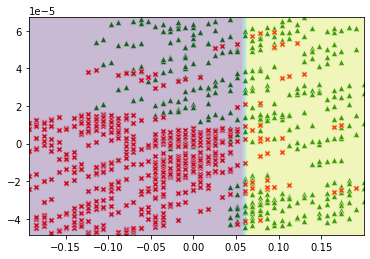

epoch: 26001	loss: 0.4452150573319898
epoch: 26002	loss: 0.44521479575872325
epoch: 26003	loss: 0.4452145342216401
epoch: 26004	loss: 0.44521427272073494
epoch: 26005	loss: 0.4452140112560021
epoch: 26006	loss: 0.4452137498274362
epoch: 26007	loss: 0.4452134884350318
epoch: 26008	loss: 0.4452132270787833
epoch: 26009	loss: 0.4452129657586852
epoch: 26010	loss: 0.44521270447473205
epoch: 26011	loss: 0.4452124432269183
epoch: 26012	loss: 0.44521218201523843
epoch: 26013	loss: 0.44521192083968697
epoch: 26014	loss: 0.44521165970025856
epoch: 26015	loss: 0.4452113985969475
epoch: 26016	loss: 0.44521113752974834
epoch: 26017	loss: 0.4452108764986557
epoch: 26018	loss: 0.445210615503664
epoch: 26019	loss: 0.4452103545447677
epoch: 26020	loss: 0.44521009362196146
epoch: 26021	loss: 0.4452098327352396
epoch: 26022	loss: 0.44520957188459676
epoch: 26023	loss: 0.4452093110700274
epoch: 26024	loss: 0.4452090502915262
epoch: 26025	loss: 0.4452087895490873
epoch: 26026	loss: 0.4452085288427056
epoc

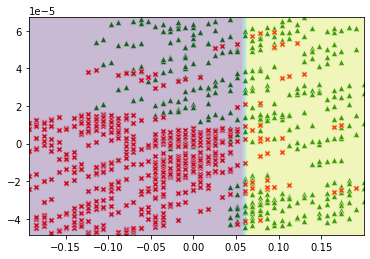

epoch: 27001	loss: 0.44497068036546045
epoch: 27002	loss: 0.44497045237473176
epoch: 27003	loss: 0.44497022441512224
epoch: 27004	loss: 0.44496999648662733
epoch: 27005	loss: 0.44496976858924236
epoch: 27006	loss: 0.44496954072296274
epoch: 27007	loss: 0.44496931288778374
epoch: 27008	loss: 0.44496908508370075
epoch: 27009	loss: 0.4449688573107092
epoch: 27010	loss: 0.44496862956880434
epoch: 27011	loss: 0.4449684018579815
epoch: 27012	loss: 0.4449681741782361
epoch: 27013	loss: 0.4449679465295635
epoch: 27014	loss: 0.4449677189119591
epoch: 27015	loss: 0.44496749132541813
epoch: 27016	loss: 0.4449672637699361
epoch: 27017	loss: 0.4449670362455082
epoch: 27018	loss: 0.44496680875212996
epoch: 27019	loss: 0.44496658128979677
epoch: 27020	loss: 0.44496635385850375
epoch: 27021	loss: 0.44496612645824646
epoch: 27022	loss: 0.44496589908902023
epoch: 27023	loss: 0.4449656717508204
epoch: 27024	loss: 0.44496544444364233
epoch: 27025	loss: 0.44496521716748144
epoch: 27026	loss: 0.444964989922

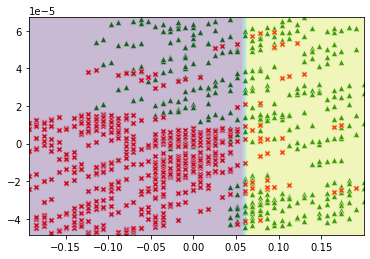

epoch: 28001	loss: 0.4447574921674257
epoch: 28002	loss: 0.4447572930969395
epoch: 28003	loss: 0.4447570940532881
epoch: 28004	loss: 0.44475689503646787
epoch: 28005	loss: 0.44475669604647466
epoch: 28006	loss: 0.44475649708330456
epoch: 28007	loss: 0.44475629814695367
epoch: 28008	loss: 0.444756099237418
epoch: 28009	loss: 0.44475590035469365
epoch: 28010	loss: 0.4447557014987767
epoch: 28011	loss: 0.4447555026696632
epoch: 28012	loss: 0.44475530386734924
epoch: 28013	loss: 0.44475510509183086
epoch: 28014	loss: 0.444754906343104
epoch: 28015	loss: 0.4447547076211649
epoch: 28016	loss: 0.44475450892600965
epoch: 28017	loss: 0.4447543102576342
epoch: 28018	loss: 0.4447541116160347
epoch: 28019	loss: 0.44475391300120704
epoch: 28020	loss: 0.4447537144131475
epoch: 28021	loss: 0.4447535158518521
epoch: 28022	loss: 0.4447533173173169
epoch: 28023	loss: 0.4447531188095379
epoch: 28024	loss: 0.4447529203285113
epoch: 28025	loss: 0.44475272187423304
epoch: 28026	loss: 0.4447525234466993
epoc

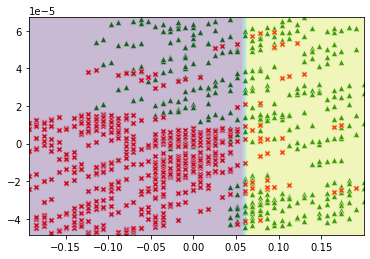

epoch: 29001	loss: 0.44457119664696576
epoch: 29002	loss: 0.4445710225453371
epoch: 29003	loss: 0.44457084846690564
epoch: 29004	loss: 0.44457067441166803
epoch: 29005	loss: 0.444570500379621
epoch: 29006	loss: 0.444570326370761
epoch: 29007	loss: 0.4445701523850849
epoch: 29008	loss: 0.4445699784225892
epoch: 29009	loss: 0.4445698044832705
epoch: 29010	loss: 0.4445696305671256
epoch: 29011	loss: 0.44456945667415115
epoch: 29012	loss: 0.4445692828043436
epoch: 29013	loss: 0.44456910895769997
epoch: 29014	loss: 0.4445689351342165
epoch: 29015	loss: 0.4445687613338902
epoch: 29016	loss: 0.4445685875567174
epoch: 29017	loss: 0.44456841380269496
epoch: 29018	loss: 0.44456824007181955
epoch: 29019	loss: 0.4445680663640877
epoch: 29020	loss: 0.4445678926794962
epoch: 29021	loss: 0.4445677190180416
epoch: 29022	loss: 0.44456754537972065
epoch: 29023	loss: 0.4445673717645299
epoch: 29024	loss: 0.4445671981724661
epoch: 29025	loss: 0.4445670246035259
epoch: 29026	loss: 0.44456685105770577
epoch

In [12]:
for i in range(epochs):
    loss = Loss(X, y, theta)
    d_theta = gradient(X, y, theta)
    theta -= lr * d_theta
    Losses.append(loss)
    print(f'epoch: {i}\tloss: {loss}')
    
    if(i % 1000 == 0):
        draw(theta, i // 1000)

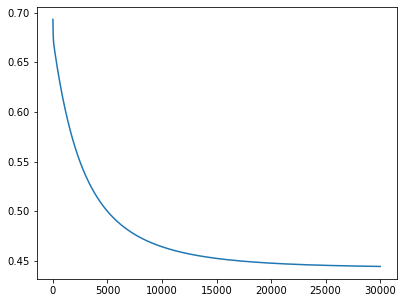

In [13]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.3, right=0.8)
plt.plot([i for i in range(len(Losses))], Losses)
plt.savefig('loss.png')
plt.show()

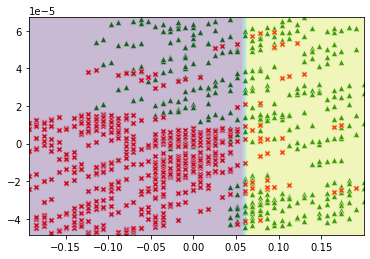

In [14]:
draw(theta, 'final')

In [15]:
!ffmpeg -i res/%d.png res/output.gif -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab